In [2]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#由Keras讀入MNIST
from keras.datasets import mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[200].size
#28*28

784

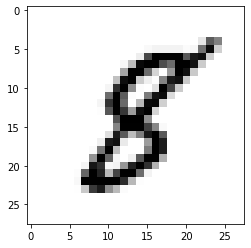

In [9]:
plt.imshow(X_train[202], cmap = 'Greys')

In [10]:
Y_train[202]
#與X_train[200]吻合

8

In [11]:
X_train.shape

(60000, 28, 28)

In [4]:
#為了要把資料讀入神經網路，因此需要將28*28的矩陣拉成784*1
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
from keras.utils import np_utils

In [6]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [22]:
Y_train[202]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [28]:
#from tensorflow.keras.backend import clear_session
#clear_session()
#先來個空的學習機
model = Sequential()
#在學習機中加入第一層layer
model.add(Dense(500, input_dim = 784))
model.add(Activation('sigmoid'))
#model.add(Dense(input_dim=28*28,units=500,activation='sigmoid'))

In [29]:
#在學習機中加入第二層layer
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [30]:
#在學習機中加入輸出層
model.add(Dense(10))
model.add(Activation('softmax'))

In [31]:
#將model組裝起來
model.compile(loss = 'mse', optimizer = SGD(lr = 0.1),
             metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

In [50]:
#392500
784*500+500

392500

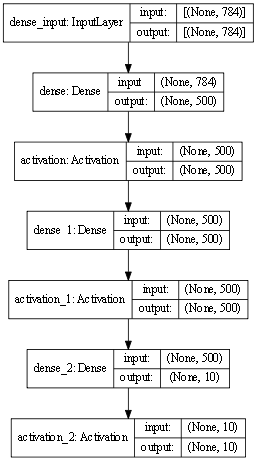

In [16]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=60)

In [33]:
model.fit(X_train, Y_train, batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0871 - accuracy: 0.2768
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0681 - accuracy: 0.5821
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0493 - accuracy: 0.7341
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0353 - accuracy: 0.8308
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0270 - accuracy: 0.8669
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0222 - accuracy: 0.8845
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0190 - accuracy: 0.8970
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0170 - accuracy: 0.9061
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0158 - accuracy: 0.9110
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0147 - accuracy: 0.9167

In [34]:
predict = model.predict_classes(X_test)

D:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


100
神經網路判斷為 :  6


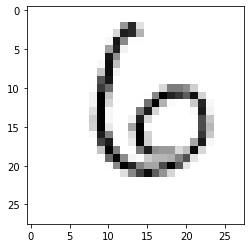

In [35]:
test_num = int(input())

plt.imshow(X_test[test_num].reshape(28, 28), cmap = 'Greys')
print("神經網路判斷為 : ", predict[test_num])

In [42]:
#小炫砲功能
from ipywidgets import interact_manual
def test(test_num):
    plt.imshow(X_test[test_num].reshape(28, 28), cmap = 'Greys')
    print("神經網路判斷為 : ", predict[test_num])
interact_manual(test, test_num = (0,9999))

interactive(children=(IntSlider(value=4999, description='test_num', max=9999), Button(description='Run Interac…

<function __main__.test(test_num)>

In [41]:
#儲存神經網路
model_json = model.to_json()
open("my_model_structure.json","w").write(model_json)
model.save_weights("my_model_weights.h5")

In [37]:
# 將模型儲存至 HDF5 檔案中
model.save('my_model.h5')

import keras.models
# 從 HDF5 檔案中載入模型
model_reload = keras.models.load_model('my_model.h5')

# 驗證模型
score = model_reload.evaluate(X_test, Y_test)

# 輸出結果
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0106 - accuracy: 0.9333
Test loss: 0.01062863040715456
Test accuracy: 0.9333000183105469


In [38]:
model_reload.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

100
神經網路判斷為 :  6


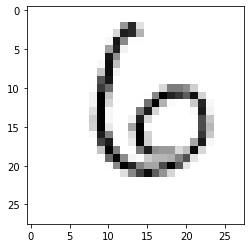

In [39]:
predict = model_reload.predict_classes(X_test)
test_num = int(input())

plt.imshow(X_test[test_num].reshape(28, 28), cmap = 'Greys')
print("神經網路判斷為 : ", predict[test_num])

In [43]:
from ipywidgets import interact_manual
def test(test_num):
    plt.imshow(X_test[test_num].reshape(28, 28), cmap = 'Greys')
    print("神經網路判斷為 : ", predict[test_num])
interact_manual(test, test_num = (0,9999))

interactive(children=(IntSlider(value=4999, description='test_num', max=9999), Button(description='Run Interac…

<function __main__.test(test_num)>